A

In [1]:
import cv2
from robomaster import robot, camera

if __name__ == '__main__':
    ep_robot = robot.Robot()
    ep_robot.initialize(conn_type="ap")

    ep_camera = ep_robot.camera

    ep_camera.start_video_stream(display=False, resolution=camera.STREAM_720P)
    img = ep_camera.read_cv2_image(strategy="newest")

    cv2.imwrite("image720p.png", img)
    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    ep_camera.stop_video_stream()
    ep_robot.close()


ModuleNotFoundError: No module named 'cv2'

B

In [14]:
import cv2

image = cv2.imread('image720p.png')

cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(image.shape) 

(720, 1280, 3)


C

In [15]:
# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HLS (Hue, Lightness, Saturation) color space
hls_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HLS)

# Extract the L-channel (Lightness)
l_channel = hls_image[:, :, 1]

# Display the L-channel image
cv2.imshow('L-channel', l_channel)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()

# Save the L-channel image if needed
cv2.imwrite('L_channel_image.png', l_channel)


True

D

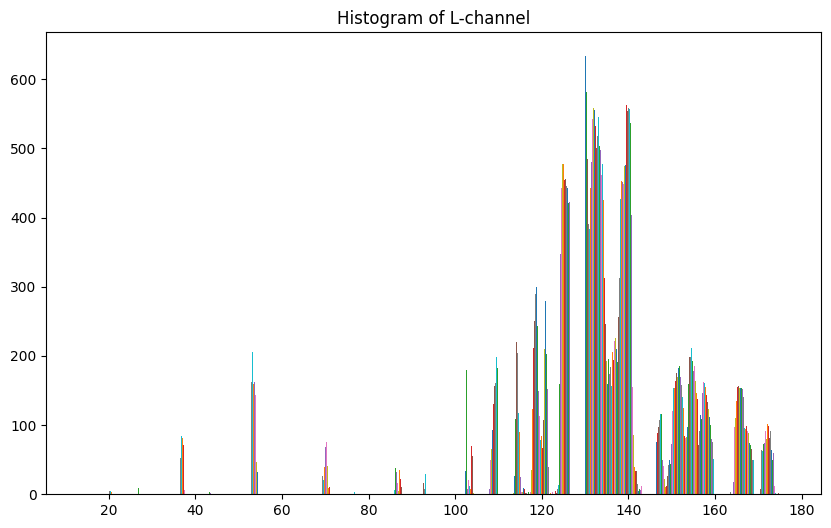

[[130 130 130 ... 128 128 128]
 [130 130 130 ... 128 128 128]
 [130 130 130 ... 127 127 127]
 ...
 [157 157 157 ... 145 145 144]
 [157 157 157 ... 147 147 145]
 [157 157 157 ... 147 147 147]]
Min value: 12
Max value: 178


In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(l_channel)
plt.title('Histogram of L-channel')
plt.show()

print(l_channel)
print(f"Min value: {l_channel.min()}")
print(f"Max value: {l_channel.max()}")

E

In [20]:
import numpy as np

# Rescale the normalized L-channel to the range [-1, 1]
l_channel_rescaled = (l_channel / np.max(l_channel))*2-1

# Display the rescaled L-channel image
cv2.imshow('l_channel_rescaled', l_channel_rescaled)
cv2.waitKey(0) 
cv2.destroyAllWindows()



F

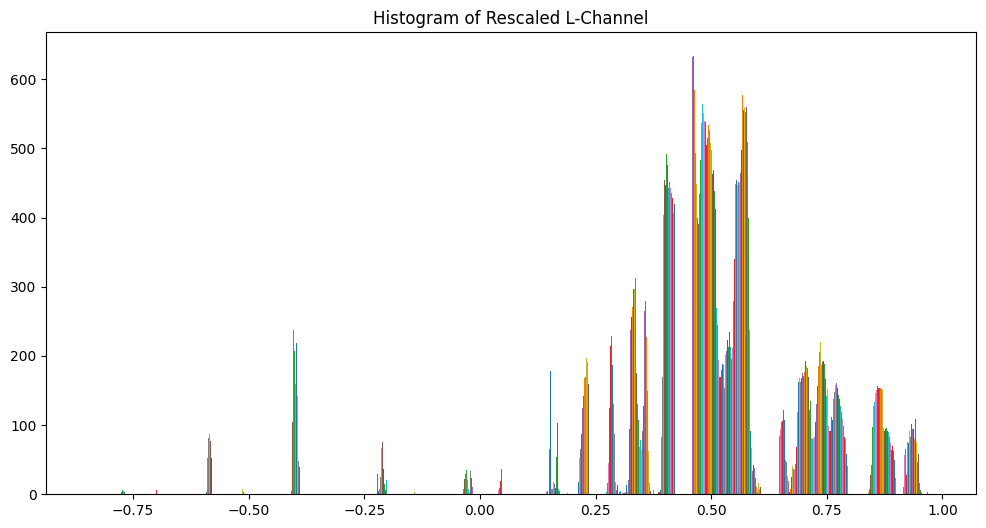

[[0.46067416 0.46067416 0.46067416 ... 0.43820225 0.43820225 0.43820225]
 [0.46067416 0.46067416 0.46067416 ... 0.43820225 0.43820225 0.43820225]
 [0.46067416 0.46067416 0.46067416 ... 0.42696629 0.42696629 0.42696629]
 ...
 [0.76404494 0.76404494 0.76404494 ... 0.62921348 0.62921348 0.61797753]
 [0.76404494 0.76404494 0.76404494 ... 0.65168539 0.65168539 0.62921348]
 [0.76404494 0.76404494 0.76404494 ... 0.65168539 0.65168539 0.65168539]]
Min value: -0.8651685393258427
Max value: 1.0


In [21]:
# Display the rescaled L-channel histogram
plt.figure(figsize=(12, 6))
plt.hist(l_channel_rescaled)
plt.title('Histogram of Rescaled L-Channel')
plt.show()

# Print some information about the rescaled L-channel
print(l_channel_rescaled)
print(f"Min value: {l_channel_rescaled.min()}")
print(f"Max value: {l_channel_rescaled.max()}")

 G

In [22]:
noise = np.random.normal(0, 1, l_channel.shape)

# Display the random noise image
cv2.imshow('noise', noise)
cv2.waitKey(0) 
cv2.destroyAllWindows()


H

In [29]:
combine = l_channel_rescaled+noise
cv2.imshow('Combine', combine)
cv2.waitKey(0) 
cv2.destroyAllWindows()


I

In [36]:
# rescale to 0 to 255
rescale_back = (l_channel_rescaled + 1) * (np.max(l_channel)/2) 

hls_image[:, :, 1] = rescale_back
img_rgb_final = cv2.cvtColor(hls_image, cv2.COLOR_HLS2RGB)
img_bgr_final = cv2.cvtColor(img_rgb_final, cv2.COLOR_RGB2BGR)

cv2.imshow('Rescale back',img_bgr_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f"Min value: {img_bgr_final.min()}")
print(f"Max value: {img_bgr_final.max()}")

Min value: 0
Max value: 255


J

In [38]:
kernel = np.ones((6, 6), np.float32)/10
blurred_image = cv2.filter2D(l_channel_rescaled, -1, kernel)
combined_blurred_image = blurred_image +noise

rescale_blurred = (combined_blurred_image + 1) * (np.max(l_channel) / 2)
hls_image[:, :, 1] = rescale_blurred
image_rgb_blured = cv2.cvtColor(hls_image, cv2.COLOR_HLS2RGB)
image_rgb_blured = cv2.cvtColor(image_rgb_blured, cv2.COLOR_RGB2BGR)

cv2.imshow('blured',image_rgb_blured)
cv2.waitKey(0)
cv2.destroyAllWindows()

